In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.lines import Line2D

/opt/software/lib/python3.9/site-packages/geopandas/plotting.py:51: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


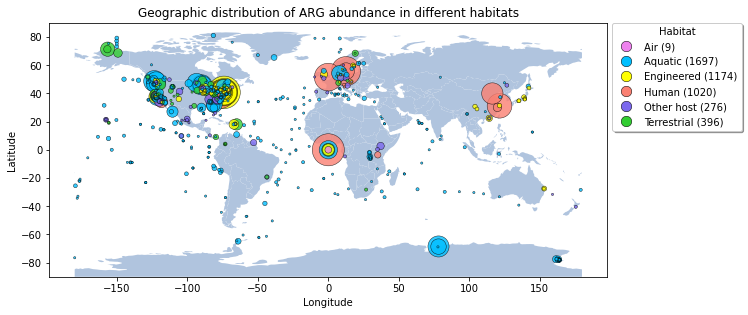

In [4]:
data = pd.read_excel("Source Data 1 The source data for Figure 1 in manuscript.xlsx")

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(10, 6))
world.plot(ax=ax, color='lightsteelblue')
ax.set_ylim(-90, 90)
ax.set(xlabel='Longitude', ylabel='Latitude')

habitat_mapping = {'Air': 'violet', 'Aquatic': 'deepskyblue', 'Human': 'salmon', 'Terrestrial': 'limegreen', 'Other host': 'mediumslateblue', 'Engineered': 'yellow'}
data['Habitat_color'] = data['Habitat'].map(habitat_mapping)

data = data.sort_values('Sample_number', ascending=False)

scatter = ax.scatter(data['Longitude'], data['Latitude'], s=data['Sample_number']*5, c=data['Habitat_color'], alpha=0.8, edgecolor='black', linewidths=0.5)

legend_handles = [Line2D([0], [0], marker='o', markersize=7, markeredgewidth=0.5,color='w', markerfacecolor=habitat_mapping[habitat], markeredgecolor='black') for habitat in sorted(habitat_mapping.keys())]
legend_labels = [f"{habitat} ({group['Sample_number'].sum()})" for habitat, group in data.groupby('Habitat')]

plt.legend(handles=legend_handles, labels=legend_labels, loc='upper left', bbox_to_anchor=(1, 1.02), markerscale=1.5, shadow=True, title='Habitat')
plt.title('Geographic distribution of ARG abundance in different habitats')
plt.show()